In [1]:
import csv
import pandas as pd
import requests
import os
from collections import defaultdict
from datetime import timedelta
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas
import matplotlib

/home/gautam/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
wm = geopandas.read_file("zip://../dataset/WaterMains.zip")

In [5]:
mst = geopandas.read_file("zip://../dataset/Hi.zip")

In [6]:
df=wm[["geometry","Material","InstallYea"]]
df["index"]=df.index
df=df[df["InstallYea"]>1800.0]


/home/gautam/.local/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [7]:
m = geopandas.sjoin(mst, df, how="inner", op='intersects')
m=m[["geometry","Material","InstallYea"]]
m["index"]=m.index
m=m.sort_values(['index','InstallYea'])


/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["NAD_1983_HARN_WISCRS_Dane_County_Feet",GEO ...

  """Entry point for launching an IPython kernel.


In [8]:
df=m.groupby(by=['index']).agg({'InstallYea': 'mean','geometry':'first','Material':'last'}).reset_index()
df=geopandas.GeoDataFrame(df)


No handles with labels found to put in legend.


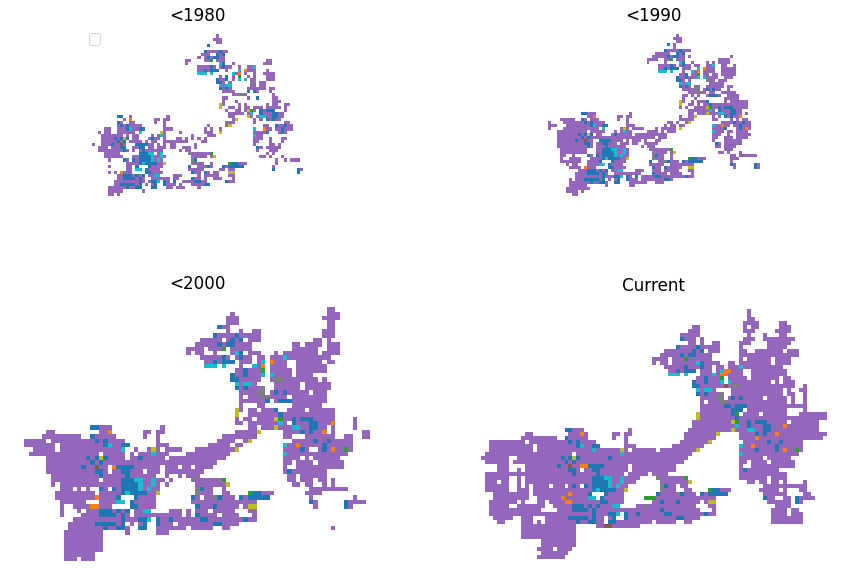

In [9]:
from matplotlib import colors

matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(421)
bx = fig.add_subplot(422)
cx = fig.add_subplot(121)
dx = fig.add_subplot(122)

df[df["InstallYea"]<1980].plot(column="Material",categorical=True, legend=True, ax=ax)
df[df["InstallYea"]<1990].plot(column="Material",ax=bx)
df[df["InstallYea"]<2000].plot(column="Material",ax=cx)
df.plot(column="Material",ax=dx,label="Current")

ax.axis("off")
ax.set_title("<1980")
bx.axis("off")
bx.set_title("<1990")
cx.axis("off")
cx.set_title("<2000")
dx.axis("off")
dx.set_title("Current")

ax.legend(loc=2)



plt.savefig('decademap.pdf',format='pdf')

In [10]:
df["Material"].unique()

array(['DI', 'CI', 'COPPER', 'SPUN', 'CIPP', 'HDPE', 'PVC', 'SAND'],
      dtype=object)

In [11]:
roadPalette = {'DI': 'purple',
               'CI': 'black',
               'SPUN': 'blue',
               'CIPP': 'green',
              'PVC':'red',
               'HDPE':'yellow',
              'SAND':'brown',
              'COPPER':'pink'}
roadPalette

{'DI': 'purple',
 'CI': 'black',
 'SPUN': 'blue',
 'CIPP': 'green',
 'PVC': 'red',
 'HDPE': 'yellow',
 'SAND': 'brown',
 'COPPER': 'pink'}

/home/gautam/.local/lib/python3.6/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/gautam/.local/lib/python3.6/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.


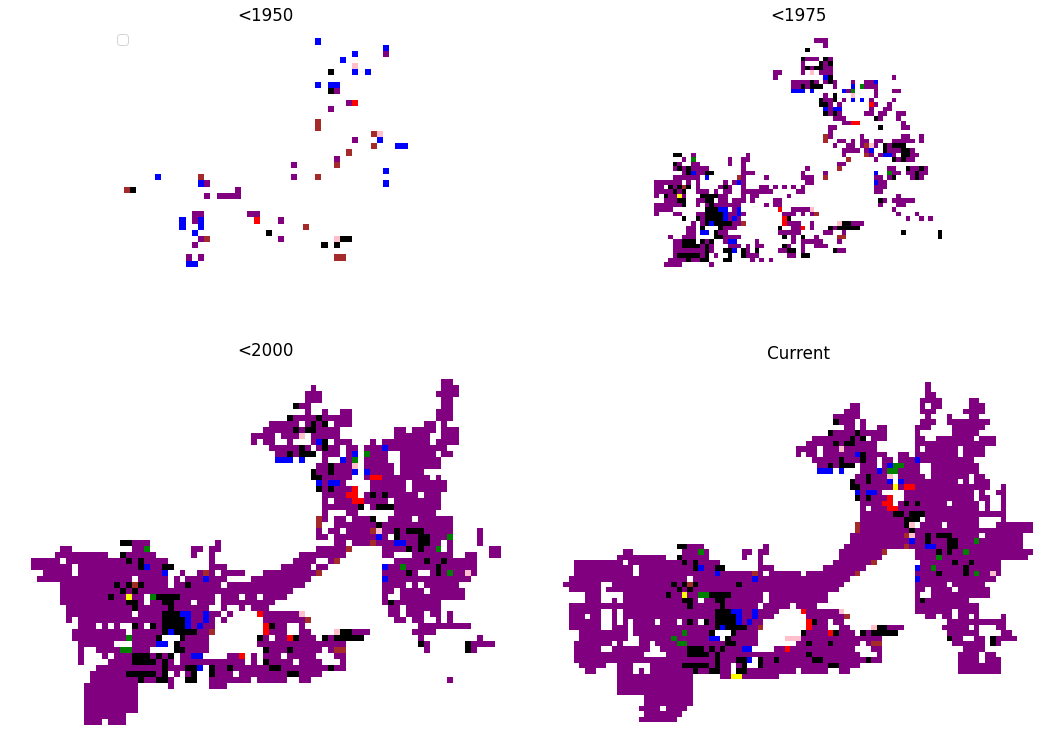

In [12]:
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(421)
bx = fig.add_subplot(422)
cx = fig.add_subplot(121)
dx = fig.add_subplot(122)

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in df.groupby('Material'):
    
    # Define the color for each group using the dictionary
    color = roadPalette[ctype]
    data[data["InstallYea"]<1950].plot(color=color,label=ctype, ax=ax)
    data[data["InstallYea"]<1975].plot(color=color,label=ctype,ax=bx)
    data[data["InstallYea"]<2000].plot(color=color,label=ctype,ax=cx)
    data.plot(color=color,label=ctype,ax=dx)

    

ax.legend(loc=2)

ax.axis("off")
ax.set_title("<1950")
bx.axis("off")
bx.set_title("<1975")
cx.axis("off")
cx.set_title("<2000")
dx.axis("off")
dx.set_title("Current")


plt.tight_layout()

fig.show()